In [125]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(context='notebook', style='darkgrid',palette='dark', font_scale=1.2)
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib inline

<AxesSubplot:>

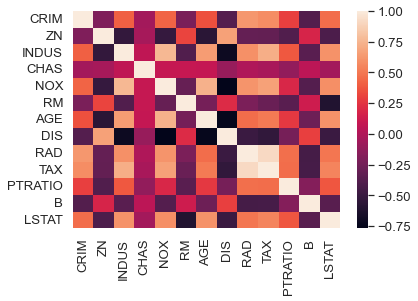

In [126]:
# Loading Dataset
boston=load_boston()
boston_df=pd.DataFrame(boston.data,columns=boston.feature_names)
sns.heatmap(boston_df.corr())

In [127]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [128]:
X, y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [129]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [130]:
class LinearRegression:
    def fit(self,X,y,max_iter=1000,alpha=0.01):
        def gradientDescent(X,y,max_iter,alpha):
            m,n=X.shape[0],X.shape[1]+1

            theta=np.random.randn(n).reshape((1,n))
            # Adding a column-vector with all 1 for intercept
            X=np.append(np.ones((m,1)),X,axis=1)
            y=y.reshape((m,1))

            for _ in range(max_iter):
                y_pred=X.dot(theta.T)
                error=y_pred-y
                
                gradient = (1 / m) * X.T.dot(error)
                theta -= alpha * gradient.T
                
            return theta
        
        self.theta=gradientDescent(X,y,max_iter,alpha)

    def predict(self,X):
        m=X.shape[0]
        X=np.append(np.ones((m,1)),X,axis=1)
        y_pred = X.dot(self.theta.T)
        return y_pred.reshape((m,1))
    


In [131]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
y_pred

array([[32.06829833],
       [23.63612402],
       [29.61174372],
       [37.20005448],
       [31.49607806],
       [17.27231755],
       [15.22034809],
       [13.07507348],
       [32.89559168],
       [20.62406778],
       [20.77959222],
       [23.12816289],
       [25.40769654],
       [26.7162282 ],
       [14.95319139],
       [33.25947922],
       [36.59009489],
       [26.1489601 ],
       [28.57918721],
       [37.79020189],
       [18.96016413],
       [17.71741071],
       [39.73773377],
       [17.82418642],
       [20.854309  ],
       [37.02980711],
       [33.04895786],
       [33.43179288],
       [26.50255857],
       [20.73651396],
       [ 9.38643058],
       [20.45026947],
       [33.98330291],
       [43.31522829],
       [22.45646303],
       [15.3464629 ],
       [19.28808646],
       [23.5365853 ],
       [22.40674903],
       [25.64540512],
       [20.6808646 ],
       [10.6531897 ],
       [32.51605705],
       [25.43210833],
       [22.14437765],
       [24

Text(0.5, 1.0, 'Predicted-Values')

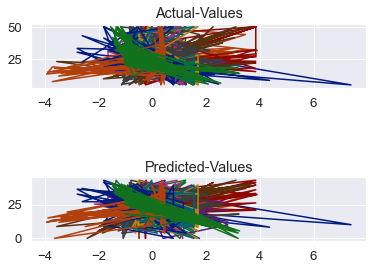

In [132]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, y_pred)
plt.title("Predicted-Values")


`SK-Learns Model Prediction`

In [133]:
from sklearn.linear_model import LinearRegression as Lin_Reg
sk_model=Lin_Reg()
sk_model.fit(X_train,y_train)
sk_pred=sk_model.predict(X_test)
sk_pred

array([32.0531515 , 23.696143  , 30.46479667, 37.23057051, 30.67917076,
       17.31517931, 15.08986328, 13.3809164 , 32.58222345, 20.74266401,
       20.24810138, 23.12057868, 25.61095793, 26.95073316, 14.83696206,
       33.93828596, 36.22350356, 25.9926691 , 28.90466277, 37.69145107,
       18.49970785, 17.38873189, 39.15163746, 17.759915  , 20.50401095,
       37.76906603, 33.0417089 , 33.44068343, 25.80973288, 20.50697589,
        9.7346948 , 20.61115683, 33.32153445, 42.53469065, 22.56858393,
       15.38961218, 19.61516769, 23.44721912, 22.46356766, 25.19063764,
       21.10725472, 11.07160304, 32.50350104, 25.53048305, 22.145757  ,
       22.36317938, 30.93449374, 18.67452215, 18.05068572, 16.33928265,
       19.26923296,  9.58935694,  0.22352711, 20.39487788, 23.77269078,
       26.73615741, 18.87973485, 19.05212879, 33.10665077, 23.25260753,
       19.76990119, 12.19401248, 24.55509207, 25.41619575, 19.01568036,
       14.08225135, 24.14307698, 31.9908372 ,  5.7928589 , 24.81

Text(0.5, 1.0, 'Sk-learns Predicted-Values')

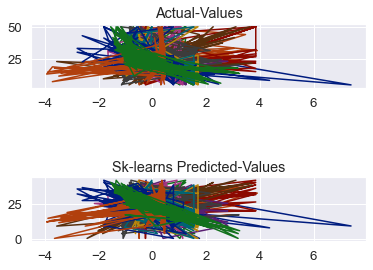

In [134]:
plt.subplot(3, 1, 1)
plt.plot(X_test, y_test)
plt.title("Actual-Values")


plt.subplot(3, 1, 3)
plt.plot(X_test, sk_pred)
plt.title("Sk-learns Predicted-Values")

In [135]:
my_mse = mean_squared_error(y_test, y_pred)
my_r2 = r2_score(y_test, y_pred)

sk_mse = mean_squared_error(y_test, sk_pred)
sk_r2 = r2_score(y_test, sk_pred)

print("My Mean Squared Error: ", my_mse)
print("My R-squared: ", my_r2)
print("sk-learns Mean Squared Error: ", sk_mse)
print("sk-learns R-squared: ", sk_r2)

My Mean Squared Error:  25.526360963969434
My R-squared:  0.7134572454072334
sk-learns Mean Squared Error:  24.969953286612167
sk-learns R-squared:  0.7197031254514574
